In [1]:
import glob
import sys

import numpy as np
import pandas as pd
import tensorflow as tf

sys.path.append("../../")

from helpers.experiment import experiment

/usr/local/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')




Preparing model for Experiment: function_dataset_01_mean



Commencing Experiment: function_dataset_01_mean

Epoch 1/10
1708/1708 [==============================] - 1s 550us/step - loss: 1.7109 - accuracy: 0.4267
Epoch 2/10
1708/1708 [==============================] - 1s 551us/step - loss: 1.4597 - accuracy: 0.5116
Epoch 3/10
1708/1708 [==============================] - 1s 546us/step - loss: 1.4276 - accuracy: 0.5161
Epoch 4/10
1708/1708 [==============================] - 1s 529us/step - loss: 1.4143 - accuracy: 0.5169
Epoch 5/10
1708/1708 [==============================] - 1s 571us/step - loss: 1.4072 - accuracy: 0.5177
Epoch 6/10
1708/1708 [==============================] - 1s 551us/step - loss: 1.4025 - accuracy: 0.5187
Epoch 7/10
1708/1708 [==============================] - 1s 584us/step - loss: 1.3994 - accuracy: 0.5198
Epoch 8/10
1708/1708 [==============================] - 1s 577us/step - loss: 1.3974 - accuracy: 0.5184
Epoch 9/10
1708/1708 [==============================] - 1

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/si

                   precision  recall  f1-score  support      mcc
                                                                
      genre_blues     0.0000  0.0000    0.0000      374   0.0000
  genre_classical     0.7343  0.8252    0.7771     4221   0.7004
    genre_country     0.0000  0.0000    0.0000      327  -0.0030
      genre_disco     0.0000  0.0000    0.0000      289   0.0000
     genre_hiphop     0.3752  0.3568    0.3658     1701   0.2977
       genre_jazz     0.3629  0.0757    0.1253     1241   0.1388
      genre_metal     0.5135  0.0286    0.0541      665   0.1143
        genre_pop     0.4116  0.5948    0.4865     4274   0.2804
     genre_reggae     0.0000  0.0000    0.0000      788  -0.0050
       genre_rock     0.5024  0.6641    0.5720     3200   0.4632
                                                                
         accuracy                       0.5193    17080   0.3938
        macro avg     0.2900  0.2545    0.2381    17080         
     weighted avg     0.4

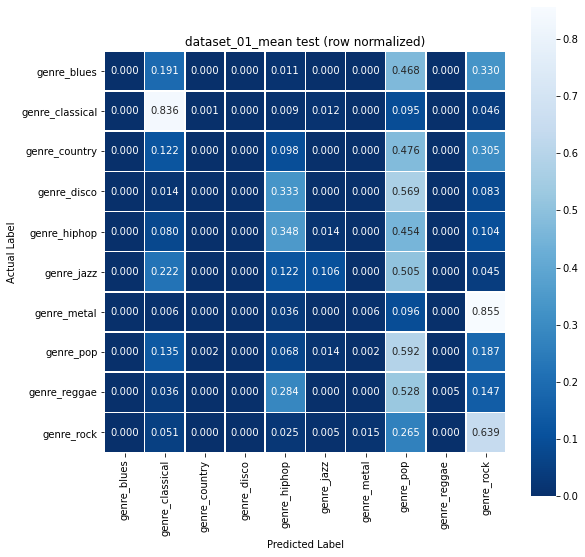

In [9]:
dataset_folder = "../../datasets/"
# datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
datasets = [f'{dataset_folder}dataset_01_mean.pickle']

learning_rate = 0.01
batch_size = 10
epochs = 10
hidden_layers = 0 # should be 0 for baseline model
hidden_size = 10

def nn_model_factory(X_train,y_train,le):
    model = tf.keras.Sequential()
    for _ in range(hidden_layers):
        model.add(tf.keras.layers.Dense(
            units=hidden_size,
            activation='tanh'
        ))
    model.add(tf.keras.layers.Dense(
        units=len(le.classes_),
        activation='softmax'
    ))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',     
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    return model

def nn_fit_call_fn(model,X_train,y_train,sample_weight):
    model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        class_weight=sample_weight,
        verbose=1
   )
    
for dataset in datasets:

    experiment(
        nn_model_factory,
        dataset,
        model_fit_call_fn=nn_fit_call_fn,
        postprocess_y_pred_fn=lambda y: np.argmax(y, axis=-1)
    )
    

In [ ]:
# isfunction(aa)